# Raspberry Pi SEO Research

## Let's do some basic analysis of keywords related to "raspberry pi"


1. First we need to import the modules needed to build our db and run analysis
2. import the csv file with the keywords given by the google keyword planner
3. build a Pandas db
4. Analyze

In [1]:
#Importing packages
import math as m
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

pd.options.mode.chained_assignment = None  # default='warn'


pd.options.display.max_columns = 70
pd.options.display.max_rows = 99

In [46]:
import os

In [2]:
df = pd.read_excel('raspberry-pi-seo.xlsx', sheet_name='raspberry-pi-seo')

### **Let's check out the number of terms (keywords) that have been given to use by the heyword planner tool**
    - To do this we can just check the number of rows that are give in the pandas dataframe by using "shape" function

In [3]:
num_rows = df.shape[0]
num_rows

710

- Okay, so we can see that there are 710 terms in our dataset, what we are going to do now is break this down into three categories

In [4]:
df1 = df.groupby(['Keyword', 'Avg. monthly searches']).size().unstack(fill_value=0)

In [23]:
aboveEqual_five_thousand = df.loc[df['Avg. monthly searches'] >= 5000]
aboveEqual_fifty_thousand = df.loc[df['Avg. monthly searches'] >= 50000]
aboveEqual_fiveHundred_thousand = df.loc[df['Avg. monthly searches'] >= 500000]

### **Let's check out the number of terms (keywords) that have a Average monthly search rate above 5,000**


In [24]:
num_rows5k = aboveEqual_five_thousand.shape[0]
num_rows5k

65

### **Let's check out the number of terms (keywords) that have a Average monthly search rate above 50,000**


In [25]:
num_rows50k = aboveEqual_fifty_thousand.shape[0]
num_rows50k

8

### **Let's check out the number of terms (keywords) that have a Average monthly search rate above 500,000**


In [26]:
num_rows500k = aboveEqual_fiveHundred_thousand.shape[0]
num_rows500k

1

## Analysis

#### It is clear to me that we should mainly focus on the keywords related to "raspberry pi" that have an average monthly search 

#### frequency greater than or equal to 50,000 for now. So let's make a new df with these keywords and then we can extract the terms 

#### and put them into an array to be used for the website.

In [29]:
frames = [aboveEqual_fiveHundred_thousand, aboveEqual_fifty_thousand]

#append dataframes
top_keywords = aboveEqual_fiveHundred_thousand.append(aboveEqual_fifty_thousand, ignore_index=True)
top_keywords = top_keywords.drop(labels=0, axis=0)
top_keywords

,Keyword,Currency,Avg. monthly searches,Competition,Competition (indexed value),Top of page bid (low range),Top of page bid (high range),Ad impression share,Organic impression share,Organic average position,In account?,In plan?,Searches: Jun 2020,Searches: Jul 2020,Searches: Aug 2020,Searches: Sep 2020,Searches: Oct 2020,Searches: Nov 2020,Searches: Dec 2020,Searches: Jan 2021,Searches: Feb 2021,Searches: Mar 2021,Searches: Apr 2021,Searches: May 2021,Concept: Platform,Concept: Phosphoinositide,Concept: Operating System,Concept: Company,Concept: Other Brands,Concept: Gene,Concept: Non-Brands,Concept: Others
1,raspberry pi,USD,500000,High,97.0,0.15,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,raspberry pi 4,USD,50000,High,97.0,0.18,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pi 4,NaN,NaN,NaN,pi4,Non-Brands,NaN
3,raspberry pi 400,USD,50000,High,100.0,0.14,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN
4,raspberry pi 3,USD,50000,High,100.0,0.27,0.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pi 3,NaN,NaN,NaN,pi3,Non-Brands,NaN
5,raspberry pi zero,USD,50000,High,100.0,0.22,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,raspberry pi zero,NaN,NaN,NaN,NaN,Non-Brands,NaN
6,raspberry pi 4 8gb,USD,50000,High,100.0,0.37,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"pi 4, raspberry pi model b",NaN,NaN,NaN,pi4,Non-Brands,NaN
7,pi4,USD,50000,Low,31.0,0.21,1.56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pi 4,NaN,NaN,NaN,pi4,Non-Brands,NaN
8,r pi,USD,50000,Low,0.0,1.14,4.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Brands,NaN


<Figure size 5760x5760 with 0 Axes>

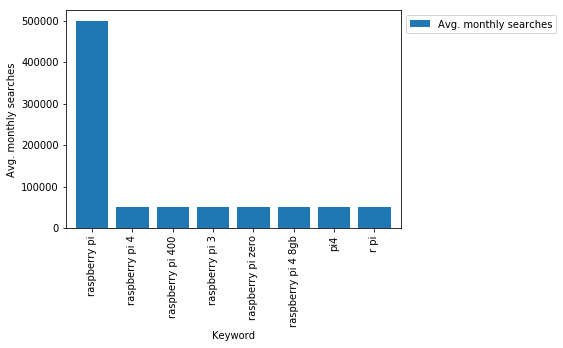

In [30]:
plt.figure(figsize=(80,80))
top_keywords.plot(x="Keyword", y=["Avg. monthly searches"], kind="bar",width=.8)
plt.xlabel("Keyword"),plt.ylabel('Avg. monthly searches'),plt.title("")
lgd = plt.legend(loc='upper left', bbox_to_anchor=(1,1))

#### Now we can go ahead and take the keywords from the data frame and put them into an array, then we will make a new file and 

#### save the array of keywords (strings) into a simple .txt file to use for website.

In [37]:
keywords = np.array(top_keywords['Keyword']).reshape(-1,1)

In [40]:
keywords = [element for sublst in keywords for element in sublst]

In [41]:
keywords

['raspberry pi',
 'raspberry pi 4',
 'raspberry pi 400',
 'raspberry pi 3',
 'raspberry pi zero',
 'raspberry pi 4 8gb',
 'pi4',
 'r pi']

In [50]:
myText = open(r'C:\Users\waelt\Documents\GitHub\armada-seo-research\raspberry-pi.txt','w')
for i in keywords:
    myText.write(i + '\n')

myText.close()